# Import All necessary Librarys

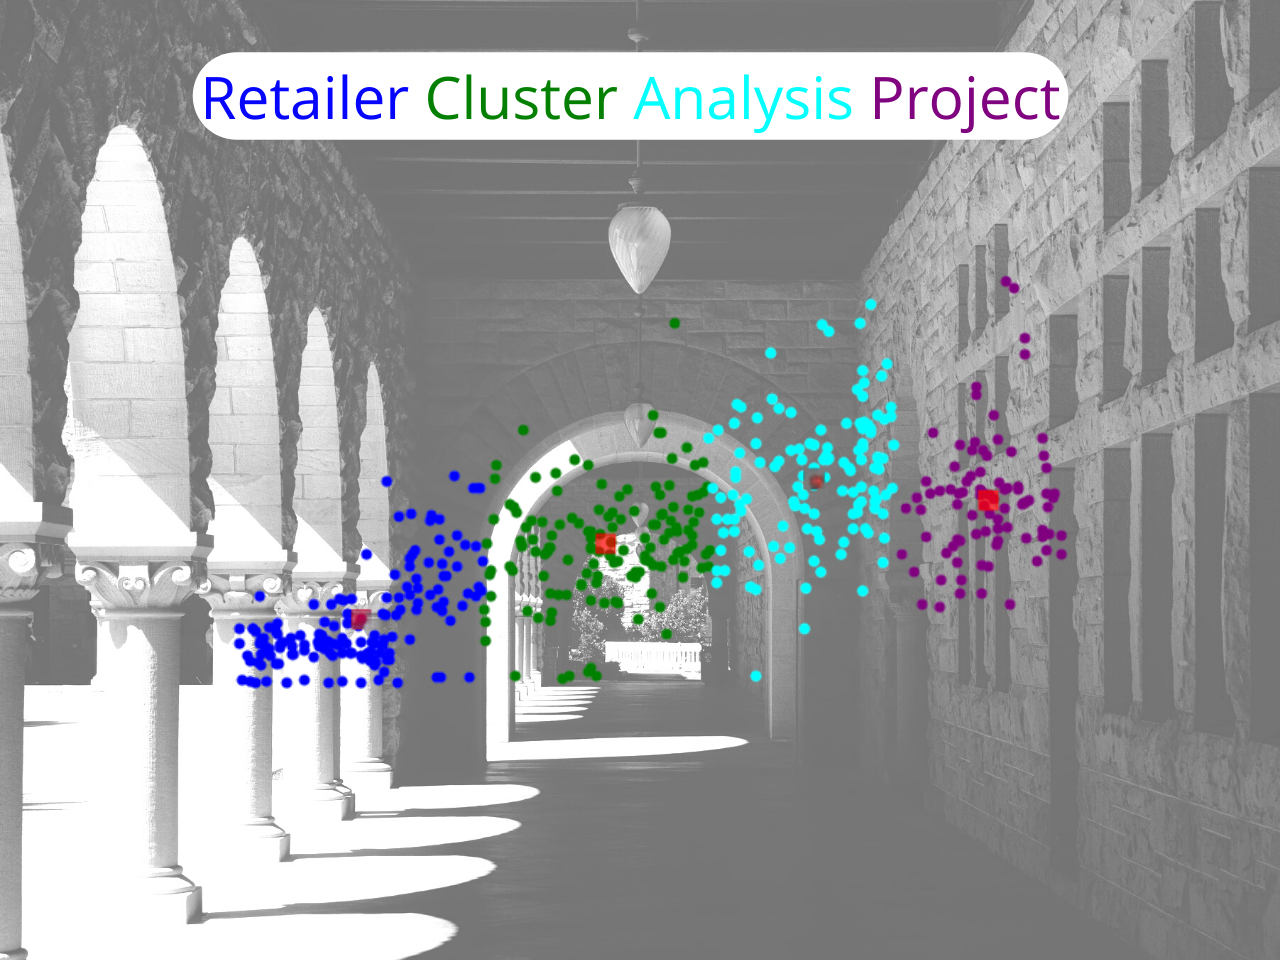

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from IPython import display
display.Image("work-5.jpg")

### Importing Data files

In [80]:
product_data = pd.read_csv('Product Data Set.csv', sep='|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [81]:
transactions_data = pd.read_csv('Transaction Data Set.csv', sep='|')
transactions_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [82]:
customer_data=pd.read_csv('Customer Data Set.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing data types

In [83]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [85]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})
customer_prod_categ=customer_prod_categ.reset_index()

In [90]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )
customer_KPIs=customer_KPIs.fillna(0)

customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [95]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Clustering  
### Select the features on which you are clustering.

In [96]:
cluster_input=customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


### Initialize a K-means model with four clusters as follows: 

In [97]:
Kmeans_model=KMeans(n_clusters=4)
Kmeans_model

KMeans(n_clusters=4)

In [98]:
#Run the K-means cluster algorithm on the input by using “fit_predict” method: 
cluster_output = Kmeans_model.fit_predict(cluster_input)
cluster_output

array([0, 2, 2, 2, 1, 0, 2, 3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 3, 0, 2, 3, 3,
       3, 1, 3, 3, 2, 1, 1, 0, 2, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 0, 3, 0, 2,
       2, 3, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 3, 0, 3, 1, 3, 0, 1,
       2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 0, 3, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1,
       1, 1, 2, 1, 3, 1, 0, 0, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 1, 0, 2, 2,
       1, 2, 0, 3, 0, 0, 3, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3,
       2, 3, 1, 1, 3, 1, 0, 1, 0, 3, 1, 2, 1, 0, 2, 1, 0, 1, 3, 3, 0, 1,
       0, 0, 3, 1, 0, 1, 2, 1, 3, 0, 3, 3, 1, 0, 1, 3, 3, 0, 3, 0, 3, 0,
       3, 2, 3, 1, 0, 0, 3, 1, 2, 0, 0, 0, 0, 1, 3, 2, 0, 3, 1, 3, 2, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 3, 2, 2, 1, 3, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 3, 3, 0, 1, 2, 3, 1, 3, 1, 2, 1, 0, 3, 3, 1, 0, 1, 2,
       2, 0, 3, 2, 2, 3, 0, 1, 0, 1, 1, 1, 0, 2, 3, 3, 3, 2, 2, 2, 0, 2,
       3, 2, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1,

In [100]:
cluster_output_pd=pd.DataFrame(cluster_output,columns=['segment'])
cluster_output_pd.head()

,segment
0,0
1,2
2,2
3,2
4,1


### Merge the cluster input containing the income and total spending for each customer and the cluster output, which contains the cluster index


In [101]:
segment_DF=pd.concat([cluster_input,cluster_output_pd],axis=1)
segment_DF.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,0
1,94475,5062.451,2
2,88610,8562.440,2
3,84313,5522.694,2
4,51498,213.512,1


In [102]:
#Having a look at the first cluster(segment 0)
segment_DF[segment_DF.segment==0].head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,0
5,132893,5234.847,0
18,137128,8021.160,0
29,144108,6866.584,0
44,143119,7469.745,0


### Now we take a look at the clusters on the chart.

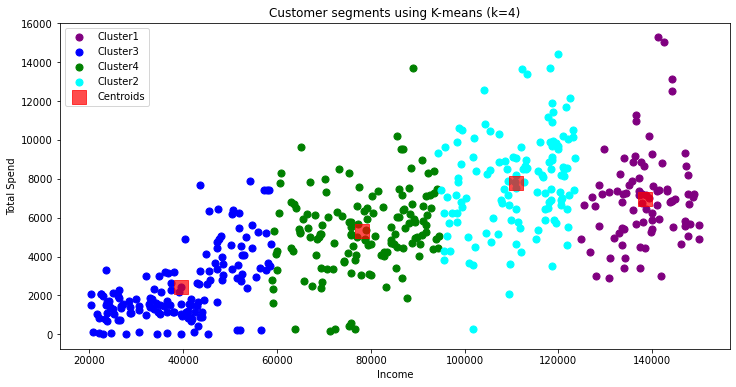

In [111]:
#Plotting the Cluster Results
plt.figure(figsize=(12,6))
#First, filter the input and cluster result. 
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')
plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster3')
plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster4')
plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster2')
#Second, indicate the centroids for each cluster
plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
#Lastly, add the metadata of the chart
plt.title('Customer segments using K-means (k=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

-------------------

# EXTRA Content

In [104]:
#We create a new table where we will dive deeper into the customer demographics
customer_demographics=pd.concat([customer_all_view,cluster_output_pd],axis=1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,segment
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,0
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451,2
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,2
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,2
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512,1


In [105]:
#We aggregate the Age and Household size to get an estimate as to what the customer of each segment is bound to look like.
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median'})

,AGE,HOUSEHOLD SIZE
segment,,
0,73.420455,2.0
1,24.808219,2.0
2,36.164286,3.0
3,47.714286,3.0


In [106]:
#We create a new function to calculate loyalty enrollment
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent


In [107]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,73.420455,2.0,65.909091
1,24.808219,2.0,51.369863
2,36.164286,3.0,32.857143
3,47.714286,3.0,67.460317
